In [5]:
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from matplotlib.pyplot import figure, show, rc
mpl.rc('font', size=10)


df = pd.DataFrame(np.loadtxt('等高线.txt'))
df = df.reset_index()

map_df = pd.melt(df, id_vars='index', var_name='var', value_name='value')
map_df['var'] = map_df['var'].astype(int)

display(df, map_df)


,index,0,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,200
0,0,1063.0,1059.0,1053.0,1058.0,1056.0,1063.0,1062.0,1066.0,1077.0,...,855.0,851.0,830.0,823.0,829.0,832.0,838.0,844.0,847.0,846.0
1,1,1076.0,1067.0,1060.0,1063.0,1076.0,1078.0,1073.0,1071.0,1073.0,...,840.0,837.0,828.0,825.0,828.0,831.0,834.0,836.0,841.0,844.0
2,2,1083.0,1074.0,1065.0,1075.0,1091.0,1090.0,1082.0,1083.0,1087.0,...,822.0,823.0,825.0,825.0,827.0,831.0,835.0,836.0,840.0,842.0
3,3,1087.0,1085.0,1079.0,1083.0,1101.0,1102.0,1094.0,1098.0,1105.0,...,823.0,824.0,826.0,829.0,829.0,834.0,838.0,840.0,843.0,845.0
4,4,1087.0,1089.0,1089.0,1092.0,1106.0,1111.0,1109.0,1116.0,1118.0,...,821.0,825.0,827.0,829.0,832.0,834.0,838.0,839.0,842.0,843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,296,1004.0,1004.0,1004.0,1004.0,1003.0,1003.0,1004.0,1005.0,1005.0,...,1249.0,1261.0,1250.0,1257.0,1267.0,1251.0,1216.0,1194.0,1201.0,1201.0
297,297,999.0,999.0,999.0,999.0,999.0,999.0,1002.0,1003.0,1002.0,...,1251.0,1276.0,1277.0,1267.0,1270.0,1255.0,1230.0,1204.0,1202.0,1204.0
298,298,998.0,998.0,997.0,995.0,994.0,996.0,1001.0,1003.0,1005.0,...,1285.0,1299.0,1300.0,1290.0,1280.0,1252.0,1227.0,1223.0,1205.0,1201.0
299,299,992.0,994.0,993.0,992.0,989.0,988.0,991.0,996.0,1000.0,...,1303.0,1317.0,1312.0,1302.0,1287.0,1266.0,1246.0,1242.0,1222.0,1213.0


,index,var,value
0,0,0,1063.0
1,1,0,1076.0
2,2,0,1083.0
3,3,0,1087.0
4,4,0,1087.0
...,...,...,...
60496,296,200,1201.0
60497,297,200,1204.0
60498,298,200,1201.0
60499,299,200,1213.0


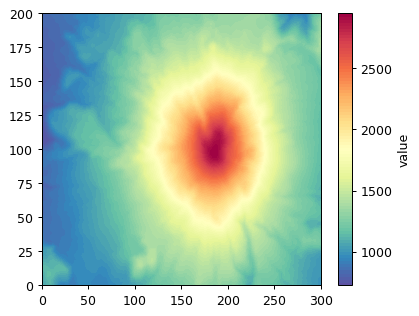

In [6]:
ngridx = 100
ngridy = 200

xi = np.linspace(0, 300, ngridx)
yi = np.linspace(0, 200, ngridy)

# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(map_df['index'], map_df['var'])
interpolator = tri.LinearTriInterpolator(triang, map_df['value'])
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# -------------------------------------(a)热力分布图 --------------------------------------------------------
fig, ax = plt.subplots(figsize=(5, 4), dpi=90)

ax.contour(xi, yi, zi, levels=100, linewidths=0.5, colors='none')
cntr = ax.contourf(xi, yi, zi, levels=100, cmap="Spectral_r")

cbar = fig.colorbar(cntr, ax=ax, label="value")
cbar.set_ticks(np.arange(500, 3500, 500))
# fig.savefig('等高线图1.pdf')


## (b) 等高线图

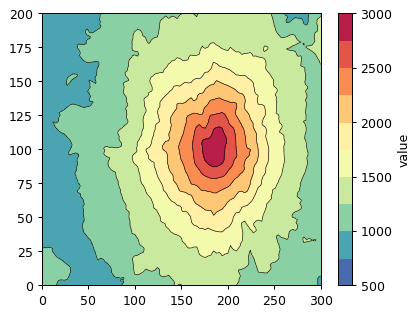

In [7]:
# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
#from scipy.interpolate import griddata
#zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
fig, ax = plt.subplots(figsize=(5, 4), dpi=90)

ax.contour(xi, yi, zi, levels=10, linewidths=0.5, colors='k')
cntr = ax.contourf(xi, yi, zi, levels=10, cmap="Spectral_r")

fig.colorbar(cntr, ax=ax, label="value")
#plt.plot(x, y, 'ko', ms=3)
#ax.axis((-2, 2, -2, 2))
#ax.set_title('' %(npts, ngridx * ngridy))
# fig.savefig('等高线图2.pdf')


## (c) 带标签的等高线图

<a list of 11 text.Text objects>

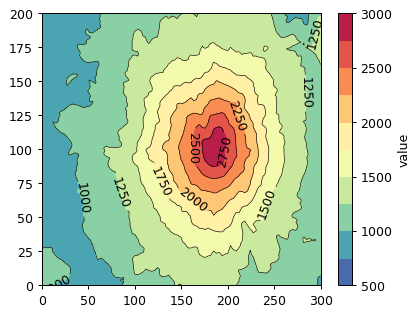

In [8]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=90)

CS = ax.contour(xi, yi, zi, levels=10, linewidths=0.5, colors='k')
cntr = ax.contourf(xi, yi, zi, levels=10, cmap="Spectral_r")
fig.colorbar(cntr, ax=ax, label="value")
CS.levels = [int(val) for val in cntr.levels]
ax.clabel(CS, CS.levels, fmt='%.0f', inline=True,  fontsize=10)
# fig.savefig('等高线图3.pdf')
